<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>

<h1> Hackwagon Academy DS101 Lesson 7 </h1>
<h2>🐼 Data Analysis with Pandas 🐼</h2> 
<h3> Lesson Outline </h3>


- 1. [Pandas](#1)
    - 1.1 [Series](#1.1)
    - 1.2 [DataFrame](#1.2)
        - 1.2.1 [Manual Way](#1.2.1)
        - 1.2.2 [Pandas Way](#1.2.2)
    - 1.3 [Filtering](#1.3)
    - 1.4 [Statistical Operations](#1.4)
    - [Practice I](#P1)
    - 1.5 [Visualisation](#1.5)
        - 1.5.1 [Bar Chart](#1.5.1)
        - 1.5.2 [Line Chart](#1.5.2)
        - 1.5.3 [Scatter Plot](#1.5.3) 
    - [Practice II](#P2)
- 2. [Airbnb Dataset](#2)
- 3. [Practice III](#P3)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=25 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Pandas </font> </h2></a>

<i>"Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series."</i>

To know more about <b>pandas</b>, read the documentation here: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd

<a id="1.1"> <h3>1.1 DataFrame </h3></a>

A two-dimensional, tabular data structure with labeled axes (rows and columns), and is the **primary** pandas data structure. You can think of a `DataFrame` as a spreadsheet in Python.
A `DataFrame` is made up of multiple `Series` objects stuck together vertically and horizontally. <br>

<a id="1.1.1"> <h4>1.1.1 Manual Way </h4></a>

Using a combination of lists and dictionaries
#### List of Lists

In [6]:
data = [
    ['Alex', 20, 1050],
    ['Bob', 52, 1400],
    ['Cat', 23, 1690]
]

# Write your code below:
df = pd.DataFrame(data, columns = ['name','age','salary'])
df

,name,age,salary
0,Alex,20,1050
1,Bob,52,1400
2,Cat,23,1690


#### List of Dictionaries

In [12]:
data = [
    {'name': 'Alex', 'age': 20, 'salary': 1050},
    {'name': 'Bob', 'age': 52, 'salary': 1400},
    {'name': 'Cat', 'age': 23, 'salary': 1690}
]

# Write your code below:

df = pd.DataFrame(data) #, columns = ['name','AGE','salary'])
df.columns = ['A','B','C']
df

,A,B,C
0,Alex,20,1050
1,Bob,52,1400
2,Cat,23,1690


<a id="1.1.2"> <h4>1.2.2 From Dataset </h4></a>

With `pandas`, opening a file is simply just using the `.read_csv()` function. Download the <b>Graduates dataset</b> from elearn `"graduates-from-university-first-degree-courses-by-type-of-course_CLEAN.csv"`.

```python
pd.read_csv("filename.csv")
```

In [23]:
# Write your code below:

df = pd.read_csv('graduates-from-university-first-degree-courses-by-type-of-course_CLEAN.csv')
# Get a sense of how your data looks likes
display(df.head(10))
display(df.tail(10))
display(df.sample(5))
# df.head(10)
# df.tail(10)

,year,sex,type_of_course,no_of_graduates
0,1993,Males,Education,0
1,1993,Males,Applied Arts,0
2,1993,Males,Humanities & Social Sciences,481
3,1993,Males,Mass Communication,0
4,1993,Males,Accountancy,295
5,1993,Males,Business & Administration,282
6,1993,Males,Law,92
7,1993,Males,"Natural, Physical & Mathematical Sciences",404
8,1993,Males,Medicine,95
9,1993,Males,Dentistry,14


,year,sex,type_of_course,no_of_graduates
650,2014,Females,Business & Administration,846
651,2014,Females,Law,176
652,2014,Females,"Natural, Physical & Mathematical Sciences",1103
653,2014,Females,Medicine,127
654,2014,Females,Dentistry,30
655,2014,Females,Health Sciences,309
656,2014,Females,Information Technology,289
657,2014,Females,Architecture & Building,258
658,2014,Females,Engineering Sciences,1251
659,2014,Females,Services,219


,year,sex,type_of_course,no_of_graduates
249,2001,Males,Dentistry,19
424,2007,Males,Accountancy,260
74,1995,Males,Services,0
619,2013,Females,Accountancy,688
560,2011,Females,Business & Administration,944


<a id="1.2"> <h3>1.2 Series </h3></a>

A `Series` == Row / Column of a `Dataframe`

- Extracting a column from a `Dataframe` is very similar to accessing data in a `dictionary`. 

In [24]:
numbers = [10,20,30,40]

# Write your code below:
s = pd.Series(numbers)
s

0    10
1    20
2    30
3    40
dtype: int64

#### Extracting a row (Series) from a DataFrame

We can extract a row using the `.iloc[]` function where in the `[]` is the row number.

In [30]:
# Write your code below:
display(df.head())
df.iloc[0]


,year,sex,type_of_course,no_of_graduates
0,1993,Males,Education,0
1,1993,Males,Applied Arts,0
2,1993,Males,Humanities & Social Sciences,481
3,1993,Males,Mass Communication,0
4,1993,Males,Accountancy,295


year                    1993
sex                    Males
type_of_course     Education
no_of_graduates            0
Name: 0, dtype: object

#### Extracting a column (Series) from a DataFrame

We can extract a column in a `DataFrame` by just calling the column header, similar to a dictionary. 

In [34]:
# Write your code below:
# df['year']
display(df.year)


# df['year of graduation']

0      1993
1      1993
2      1993
3      1993
4      1993
       ... 
655    2014
656    2014
657    2014
658    2014
659    2014
Name: year, Length: 660, dtype: int64

<a id="1.3"> <h3>1.3 Filtering </h3></a>

We can filter for results within a `DataFrame` to get the data we want. 

We specify the column we want to isolate in the DataFrame, then specify the boolean condition we are looking for. For example, we want to find the `Females` in the `Sex` column. 

```python
df['sex'] == 'Females'

# or for multiple conditions, we link them by & (and) or | (or) symbols
# where each condition is surrounded by a ()

(df['sex'] == 'Females') & (df['type_of_course'] == 'Medicine')

```

This gives us a Boolean Series of multiple `True` and `False` values. 

In [37]:
#(df['sex'] == 'Females') | (df['type_of_course'] == 'Medicine')

# Write your code below:
df['sex'] == 'Females'


0      False
1      False
2      False
3      False
4      False
       ...  
655     True
656     True
657     True
658     True
659     True
Name: sex, Length: 660, dtype: bool

We put this Boolean Series inside another `[]` to take out the data within the DataFrame. What this does is it only extracts the rows with the `True` value within the DataFrame. For example,

```python
df[df['sex'] == 'Females']

```

<b> It is important to note that this does not permanently alter or change the original DataFrame in any way. As such, all filtered data should be stored into another variable.</b>

In [42]:
# Write your code below:

# df_females = df[df['sex'] == 'Females']
# df_females

# and --> &, or --> |
# df['type_of_course'] == 'Medicine'
# df[df['type_of_course'] == 'Medicine']
(df['sex'] == 'Females') & (df['type_of_course'] == 'Medicine')

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [45]:
condition_1 = df['sex'] == 'Females'
condition_2 = df['type_of_course'] == 'Medicine'

df[condition_1 & condition_2]

,year,sex,type_of_course,no_of_graduates
23,1993,Females,Medicine,61
53,1994,Females,Medicine,66
83,1995,Females,Medicine,48
113,1996,Females,Medicine,53
143,1997,Females,Medicine,40
173,1998,Females,Medicine,42
203,1999,Females,Medicine,41
233,2000,Females,Medicine,37
263,2001,Females,Medicine,42
293,2002,Females,Medicine,60


<a id="1.4"> <h3>1.4 Statistical Operations</h3></a>

`Dataframes` and `Series` objects have many useful methods to help you compute statistics.

<table>
  <tr>
    <th>Statistical measure</th>
    <th>Dataframe method</th>
    <th>Series method</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Mean</td>
    <td>df.mean()</td>
    <td>df['column_name'].mean()</td>
    <td>Returns the mean of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Median</td>
    <td>df.median()</td>
    <td>df['column_name'].median()</td>
    <td>Returns the median of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Standard Deviation</td>
    <td>df.std()</td>
    <td>df['column_name'].std()</td>
    <td>Returns the standard deviation of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Sum</td>
    <td>df.sum()</td>
    <td>df['column_name'].sum()</td>
    <td>Returns the sum of all columns / the selected column</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [48]:
# Write your code below:

import statistics as st
st.mean(df['no_of_graduates'])


359.07878787878786

In [50]:
print(df['no_of_graduates'].mean())
print(df['no_of_graduates'].median())
print(df['no_of_graduates'].std())
print(df['no_of_graduates'].sum())

359.07878787878786
140.0
548.0897242528899
236992


In [54]:
display(df['year'].sum())

1322310

In [56]:
df.std()['no_of_graduates']

548.0897242528899

In [57]:
df['no_of_graduates'].std()

548.0897242528899

<a id="P1"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>


#### Question 1

<b>How many `Females` students have taken `Law`?</b>

**Expected output:**

    2574

In [52]:
# Write your code below:
condition_1 = df['sex'] == 'Females'
condition_2 = df['type_of_course'] == 'Law'

female_law = df[condition_1 & condition_2]
female_law['no_of_graduates'].sum()

2574

#### Question 2

<b>How many students have taken `Information Technology` between 2000 and 2014, both years inclusive?</b>

**Expected output:**

    9084

In [66]:
# Write your code below:
condition_1 = df['type_of_course'] == 'Information Technology'

students = df[(condition_1) & (df['year'] >= 2000) &  (df['year'] <= 2014)]
students['no_of_graduates'].sum()

9084

In [68]:
condition_1 = df['type_of_course'] == 'Information Technology'
condition_2 = (df['year'] >= 2000) &(df['year']<=2014)
df[condition_1 & condition_2]['no_of_graduates'].sum()

9084

<a id="1.5"> <h3>1.5 Visualisation </h3></a>

<b>Pandas</b> interfaces beautifully with <b>Matplotlib</b> to provide us with a very high-level, easy-to-use application program interface (API).

<a id="1.5.1"> <h4>1.5.1 Bar Chart </h4></a>

We can create Bar Charts with pandas easily. Here we take <b>Alcohol Consumption By Country</b> this url: https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv"

# Write your code below:

df = pd.read_csv(url)
df.head()

,location,alcohol
0,Belarus,17.5
1,Moldova,16.8
2,Lithuania,15.4
3,Russia,15.1
4,Romania,14.4


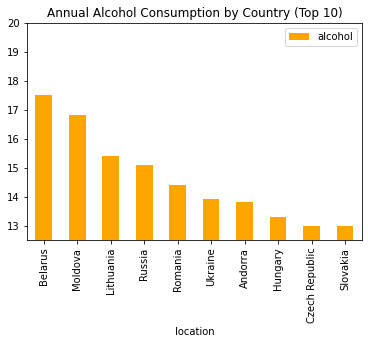

In [74]:
# Fill up the parameters
df.iloc[:10].plot(
    kind = 'bar', 
    x = 'location', 
    y = 'alcohol', 
    color = 'orange', 
    title = 'Annual Alcohol Consumption by Country (Top 10)',
    ylim = (12.5, 20)
)
plt.show()

<a id="1.5.2"> <h4>1.5.2 Line Chart </h4></a>

_The line chart is represented by a series of datapoints connected with a straight line. Line charts are most often used to visualize data that changes over time._

**Example**

`Apple Stock Price Data` 

source: https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


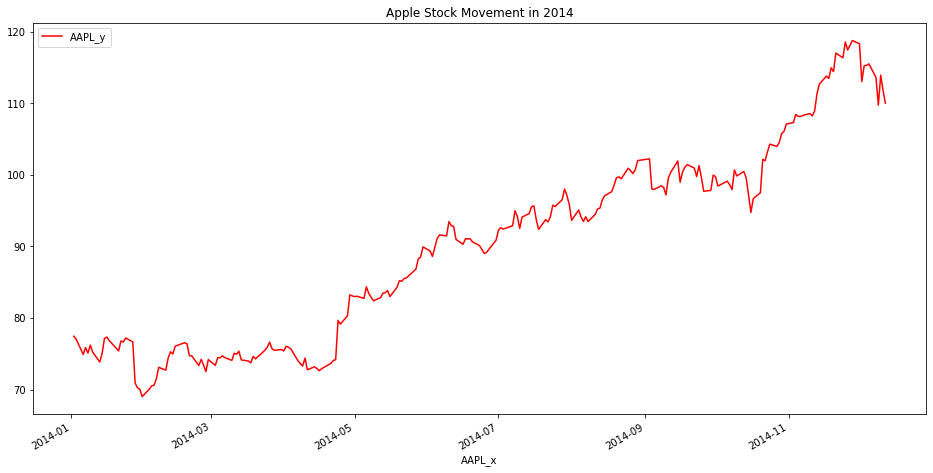

In [86]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv"

df = pd.read_csv(url)
display(df.head())

df['AAPL_x'] = pd.to_datetime(df['AAPL_x'])

# Write your code below:

df.plot(
    x='AAPL_x', y='AAPL_y',
    figsize = (16,8),
    title = 'Apple Stock Movement in 2014',
    color = 'red'
)
plt.show()

<a id="1.5.3"> <h4>1.5.3 Scatterplot </h4></a>


_A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis._

**Example**
`Motor Cars Data`

source: https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


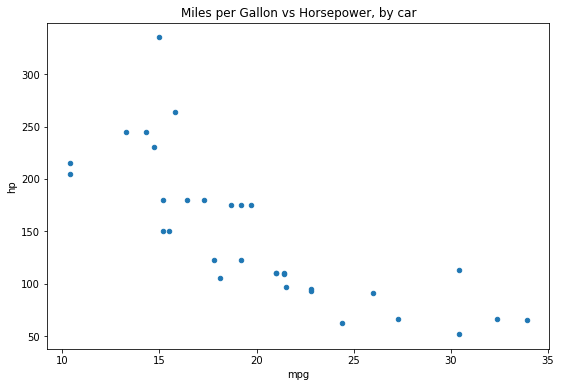

In [95]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv"

df = pd.read_csv(url)

display(df.head())

# Write your code below:
df.plot(
    kind = 'scatter',
    x = 'mpg', y = 'hp',
    title = 'Miles per Gallon vs Horsepower, by car',
    figsize = (9,6)
)
plt.show()

<a id="P2"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

The following `Dataframe` holds data of countries' **life expectancies** and **GDP**.

Investigate and visualise (with matplotlib) the relationship between any pair of these variables with an appropriate chart.

,country,life expectancy,GDP per capita,population,year
0,Algeria,72.301,6223.367465,33333216.0,2007
1,Angola,42.731,4797.231267,12420476.0,2007
2,Benin,56.728,1441.284873,8078314.0,2007
3,Botswana,50.728,12569.851770,1639131.0,2007
4,Burkina Faso,52.295,1217.032994,14326203.0,2007


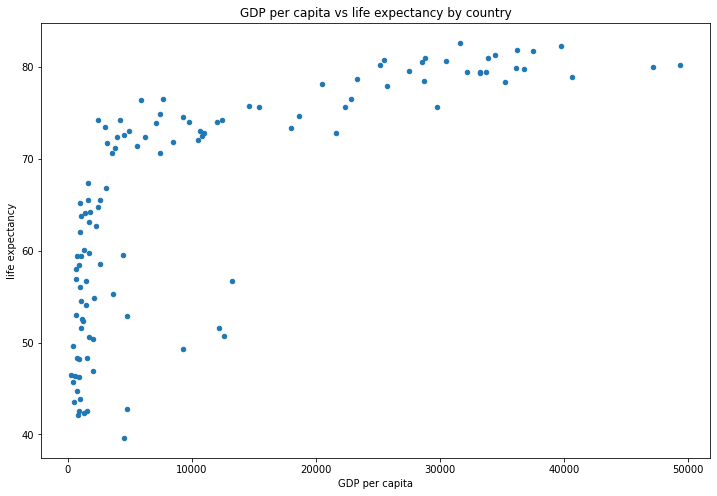

In [102]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/bubble_chart_tutorial.csv"

# Write your code below:
# Step 1: Read dataset
df = pd.read_csv(url)

# Step 2: Display the dataset
display(df.head())

# Step 3: Plot the scatterplot
df[df['life expectancy'] >= 10].plot(
    kind = 'scatter',
    x = 'GDP per capita', y = 'life expectancy',
    title = 'GDP per capita vs life expectancy by country',
    figsize = (12,8)
)
plt.show()


In [100]:
df[df['life expectancy'] < 10]

,country,life expectancy,GDP per capita,population,year
60,Iran,0.964,11605.71449,69453570.0,2007


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=25 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Airbnb Dataset </font> </h2></a>

<img src="http://www.stickpng.com/assets/images/580b57fcd9996e24bc43c513.png" width="400">
<br>
</br>
<br>
</br>

<b>Welcome to your final project of Hackwagon Academy DS101! You've come a long way since the start of this course and if you've been on track with our exercises, you should find this doable. </b>

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company does not own any lodging; it is merely a broker and receives percentage service fees (commissions) from both guests and hosts in conjunction with every booking. In this project, we aim to use algorithms and libraries to mine the reviews people have submitted on Singapore AirBnB rentals in order to provide descriptive analytics.

Start by reading the dataset:

In [104]:
# Write your code below:

import pandas as pd
df = pd.read_csv('airbnb_data.csv')
df.head()

,listing_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,1133718,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,9,4.5,12,1.0,NaN,74.0,NaN,2017-05-17 09:10:25.431659,1.293354,103.769226,0101000020E6100000E84EB0FF3AF159409C69C2F693B1...
1,3179080,1280,15295886,Shared room,NaN,Singapore,NaN,TS17,15,5.0,12,1.0,NaN,77.0,NaN,2017-05-17 09:10:24.216548,1.310862,103.858828,0101000020E6100000E738B709F7F659403F1BB96E4AF9...
2,15303457,1280,97053568,Shared room,NaN,Singapore,NaN,MK05,0,0.0,14,1.0,NaN,60.0,NaN,2017-05-17 09:10:16.969900,1.333744,103.764612,0101000020E610000044882B67EFF0594093C7D3F20357...
3,13902389,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,0,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.196321,1.294119,103.769178,0101000020E61000005FB35C363AF15940971DE21FB6B4...
4,13902391,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,1,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.170457,1.292766,103.768432,0101000020E6100000CB4C69FD2DF159407F17B6662BAF...


<h4> Q1. List out each neighborhoods and their number of listings <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Counting with dictionaries
</i>

<b>Expected Output:</b>

    When you search for ['TS17'], it should give you 342 counts.

In [106]:
# Write your code below:

neighborhood_counts = df['neighborhood'].value_counts()
neighborhood_counts['TS17']

342

<h4> Q2. List out each neighborhood and their average overall_satisfaction <font color='red'>(5 marks)</font> </h4>

<b>Note: You should filter out listings whose reviews are 0. </b>

<i> Hint
1. Create dictionary where key is the neighborhood_id and value is a list of overall_satisfaction
2. Create another dictionary to compute the average
</i>

<b>Expected Output:</b>
    
    When you search for ['TS17'], it should give you an average score of 2.859447004608295.

In [112]:
# Write your code below:

df_groupby = df[df['reviews']>0].groupby('neighborhood')
df_groupby['overall_satisfaction'].mean()['TS17']

2.859447004608295

In [113]:
df[df['reviews']>0].groupby('neighborhood')['overall_satisfaction'].mean()['TS17']

2.859447004608295

<h4> Q3. List out each neighborhood and their average price <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Similar to previous question
</i>

<b>Expected Output:</b>

    When you search for ['TS17'], it should give you an average price of 95.5672514619883.

In [120]:
# Write your code below:
df_groupby = df.groupby('neighborhood')
df_groupby['price'].mean()['TS17']


neighborhood
MK01     108.570850
MK02     111.333333
MK03      76.918750
MK04      95.371429
MK05      96.594771
MK06      60.781022
MK07      84.500000
MK09      47.653846
MK10      70.109756
MK11      70.625000
MK13      61.330000
MK14      44.583333
MK15     114.000000
MK16      66.209302
MK17     145.510067
MK18      84.633508
MK19      77.222222
MK20      88.086957
MK21      71.194805
MK22      73.860656
MK23      79.823529
MK24      79.066066
MK25      87.170960
MK26      86.345133
MK27      71.220779
MK28      75.072000
MK29      64.147059
MK30      33.000000
MK31      77.555556
MK34    1428.666667
TS01     279.181818
TS02     153.486486
TS03     140.095588
TS04      90.578947
TS05     138.420000
TS06      79.308511
TS07      76.900000
TS08      73.785714
TS09     129.925000
TS10      90.916667
TS11     110.892857
TS12      85.177419
TS13     107.000000
TS14      58.823529
TS15      67.473684
TS16      77.033333
TS17      95.567251
TS18     134.598592
TS19     105.236220
TS20   

<h4> Q4. Plot a distribution of counts of the overall_satisfaction <font color='red'>(5 marks)</font></h4>

<b>Note: You should filter out listings whose reviews are 0. </b>

<i> Hint
1. Counting with dictionaries
2. Get a list of tuples with `.items()`
3. Create 2 lists: 
    - 1 for all the scores labels
    - 1 for all the counts 
4. Plot with the 2 lists
</i>

<b>Expected Output:</b>

<img src="https://i.imgur.com/bj0ecjO.png" width="300">

In [126]:
display(df['overall_satisfaction'].unique())
display(df['overall_satisfaction'].nunique())

array([4.5, 5. , 0. , 4. , 3.5, 2.5, 3. , 2. , 1. , 1.5])

10

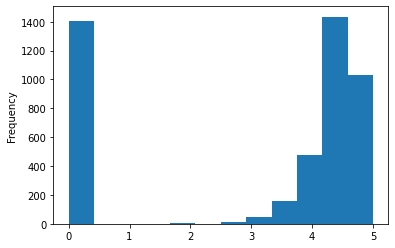

In [122]:
# Write your code below:
df_nonzero = df[df['reviews']>0]
df_nonzero['overall_satisfaction'].plot(
    kind = 'hist',
    bins = 12
)
plt.show()

<h4> Q5. Plot a geographical representation of all of the listings in Singapore <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Create a list for latitude
2. Create a list for longitude
3. Append each listing's latitude and logitude to the lists
4. Plot a scatter plot using both lists
</i>

<b>Expected Output:</b>

<img src='https://i.imgur.com/9Dp5HrD.png' width="300">    

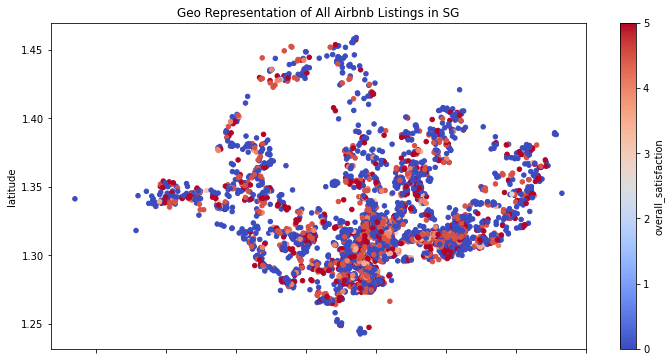

In [132]:
df.head()
df.plot(
    kind = 'scatter',
    x = 'longitude', y = 'latitude',
    title='Geo Representation of All Airbnb Listings in SG',
    c='overall_satisfaction',colormap='coolwarm',
    figsize=(12,6)
)
plt.show()

<a id="P3"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice III </font><font color="skyblue"> * </font></h2></a>


<img src="https://s.yimg.com/ny/api/res/1.2/_qLpCqbdgKq0nnY3UDmI2w--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9NzQ0O2g9Mzcy/http://media.zenfs.com/en/homerun/feed_manager_auto_publish_494/87db61c8ea6d6fcc4122595bb0c0c2c5" width="300">

This dataset has been source from the Lazada marketplace, where we have above <b>36 thousand rows</b> of data to work with. <b>Each row represents one product</b>. Opening this file in Microsoft Excel would look like this:

<img src="https://i.imgur.com/E0QJP92.png" width="500">

We're going to do some simple analysis with these products and see what we can come up with.

#### Read Dataset

In [133]:
# Write your code below:
df = pd.read_csv('lazada_data.csv')
df.head()


,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,TV Audio / Video Gaming & Wearables,Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international


<h3>Descriptive Analytics </h3>

#### Question 1
How many items are more than $50?

In [134]:
# Write your code below:

len(df[df['price']>50])

21135

In [136]:
df[df['price']>50].shape[0] # tuple of rows and columns

21135

#### Question 2
How many items are listed in <b>Singapore</b>, <b>Malaysia</b>, <b>Phillippines</b>?


In [141]:
# Write your code below:

display(df['country'].value_counts()['sg'])
display(df['country'].value_counts()['my'])
display(df['country'].value_counts()['ph'])

8638

16413

11232

#### Question 3

For the `category_1` of `Fashion`, how many items are for `Men` and how many items are for `Women`?

In [169]:
# Write your code below:

df_fashion = df[df['category_lvl_1']=='Fashion']
df_fashion['category_lvl_2'].value_counts()[['Women','Men']]

Women    3944
Men      1609
Name: category_lvl_2, dtype: int64

### Visualisation

####  Distribution of SG Category Level 1 Products

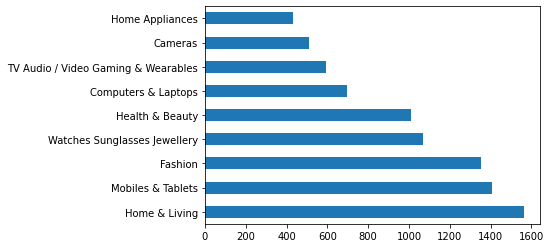

In [160]:
# Write your code below:

def visualize_by_country(country):
    df_country = df[df['country']==country]
    df_country['category_lvl_1'].value_counts().plot(kind='barh')
    plt.show()

visualize_by_country('sg')

####  Distribution of MY Category Level 1 Products

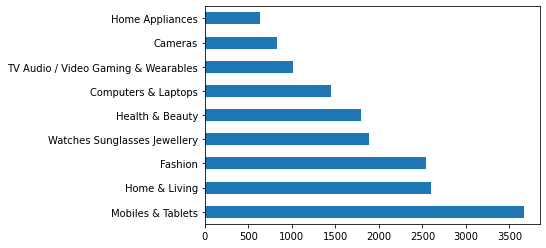

In [162]:
# Write your code below:

visualize_by_country('my')

####  Distribution of PH Category Level 1 Products

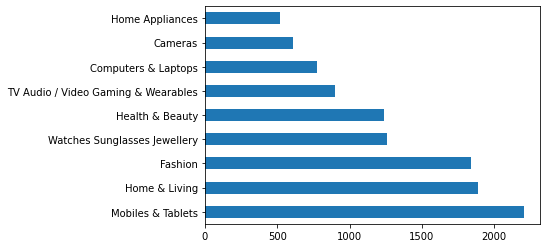

In [163]:
# Write your code below:

visualize_by_country('ph')

array(['my', 'ph', 'sg'], dtype=object)

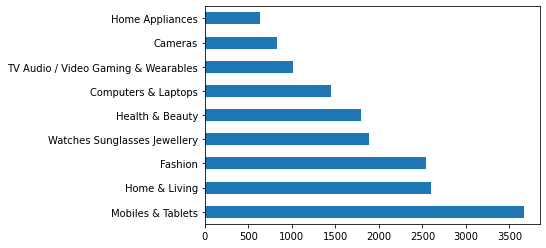

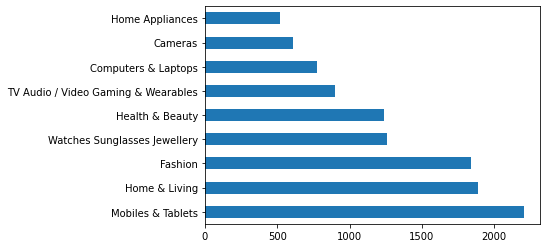

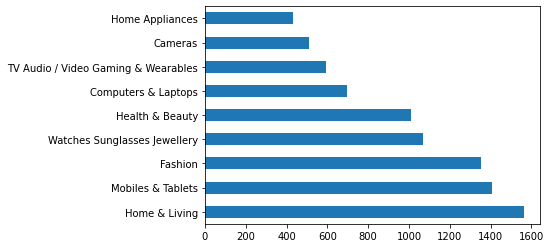

In [164]:
# bonus
unique_country_list = df['country'].unique()
display(unique_country_list)

for country in unique_country_list:
    visualize_by_country(country)